In [65]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# SQL query
from wrangle import get_zillow17_data
# fill missing values
from sklearn.impute import SimpleImputer

Acquire the data

In [66]:
# use the wrangle.py file to get the zillow data
zillow_data = get_zillow17_data()

Let me get that for you...


In [67]:
# summerize the data
zillow_data.head()


,Unnamed: 0,propertylandusetypeid,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc
0,0,269.0,0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN,Planned Unit Development
1,1,261.0,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,Single Family Residential
2,2,47.0,2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,...,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN,Store/Office (Mixed Use)
3,3,47.0,3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,...,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN,Store/Office (Mixed Use)
4,4,31.0,4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,...,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN,Commercial/Office/Residential Mixed Used


In [68]:
# Look at the data types
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982285 entries, 0 to 2982284
Data columns (total 61 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   propertylandusetypeid         float64
 2   id                            int64  
 3   parcelid                      int64  
 4   airconditioningtypeid         float64
 5   architecturalstyletypeid      float64
 6   basementsqft                  float64
 7   bathroomcnt                   float64
 8   bedroomcnt                    float64
 9   buildingclasstypeid           float64
 10  buildingqualitytypeid         float64
 11  calculatedbathnbr             float64
 12  decktypeid                    float64
 13  finishedfloor1squarefeet      float64
 14  calculatedfinishedsquarefeet  float64
 15  finishedsquarefeet12          float64
 16  finishedsquarefeet13          float64
 17  finishedsquarefeet15          float64
 18  finishedsquarefeet50  

In [69]:
zillow_data.shape

(2982285, 61)

Take aways:

- Alot of the data is missing
- There are some redundant columns(unnamed_0, id, index)
- IDs that refered to extenal sources need to join in

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [70]:
# create a dataframe from the zillow database for all 'Single Family Residential' properties
zillow_data_sf = zillow_data[zillow_data['propertylandusedesc'] == 'Single Family Residential']
zillow_data_sf

,Unnamed: 0,propertylandusetypeid,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc
1,1,261.0,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,Single Family Residential
15,15,261.0,15,11193347,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,10.0,2016.0,10.0,NaN,NaN,NaN,NaN,Single Family Residential
16,16,261.0,16,11215747,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,10.0,2016.0,10.0,NaN,NaN,NaN,NaN,Single Family Residential
17,17,261.0,17,11229347,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,2108.0,2016.0,2108.0,174.21,NaN,NaN,NaN,Single Family Residential
20,20,261.0,20,11324547,1.0,NaN,NaN,2.0,4.0,NaN,...,NaN,222321.0,296425.0,2016.0,74104.0,6941.39,NaN,NaN,NaN,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982268,2982268,261.0,2982268,14356230,NaN,NaN,NaN,3.0,4.0,NaN,...,NaN,396187.0,960756.0,2016.0,564569.0,13494.52,NaN,NaN,NaN,Single Family Residential
2982270,2982270,261.0,2982270,14157725,NaN,NaN,NaN,4.5,4.0,NaN,...,NaN,388642.0,536061.0,2016.0,147419.0,6244.16,NaN,NaN,NaN,Single Family Residential
2982272,2982272,261.0,2982272,14356183,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,204876.0,208057.0,2016.0,3181.0,5783.88,NaN,NaN,NaN,Single Family Residential
2982275,2982275,261.0,2982275,14367624,NaN,NaN,NaN,2.5,3.0,NaN,...,NaN,294912.0,424353.0,2016.0,129441.0,5302.70,NaN,NaN,NaN,Single Family Residential


In [71]:
# useing zillow_data_sf, create a dataframe with only the following columns: bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips
zillow_data_sf_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']
zillow17_sf = zillow_data_sf[zillow_data_sf_cols]
zillow17_sf.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
15,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
16,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
17,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [72]:
# check the data types
zillow17_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 1 to 2982282
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


Prepare the data

In [73]:
# check for missing values
zillow17_sf.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [74]:
# fill all missing values utilizing simple imputation
imputer = SimpleImputer(strategy='median')

In [75]:
# create a loop to impute the missing values
for col in zillow17_sf.columns:
    zillow17_sf[col] = imputer.fit_transform(zillow17_sf[col].values.reshape(-1, 1))

In [76]:
# check for missing values
zillow17_sf.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [77]:
# identify the outliers
zillow17_sf.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152863.0,3.287195,0.954752,0.00,3.00,3.00,4.0,25.00
bathroomcnt,2152863.0,2.230686,0.999277,0.00,2.00,2.00,3.0,32.00
calculatedfinishedsquarefeet,2152863.0,1861.909957,1219.807239,1.00,1259.00,1623.00,2204.0,952576.00
taxvaluedollarcnt,2152863.0,461865.500734,699598.880941,1.00,188216.00,327671.00,534455.0,98428909.00
yearbuilt,2152863.0,1960.936888,22.114935,1801.00,1949.00,1958.00,1975.0,2016.00
taxamount,2152863.0,5631.717557,8170.761507,1.85,2538.28,4108.95,6406.9,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.0,6111.00


array([[<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>],
       [<AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

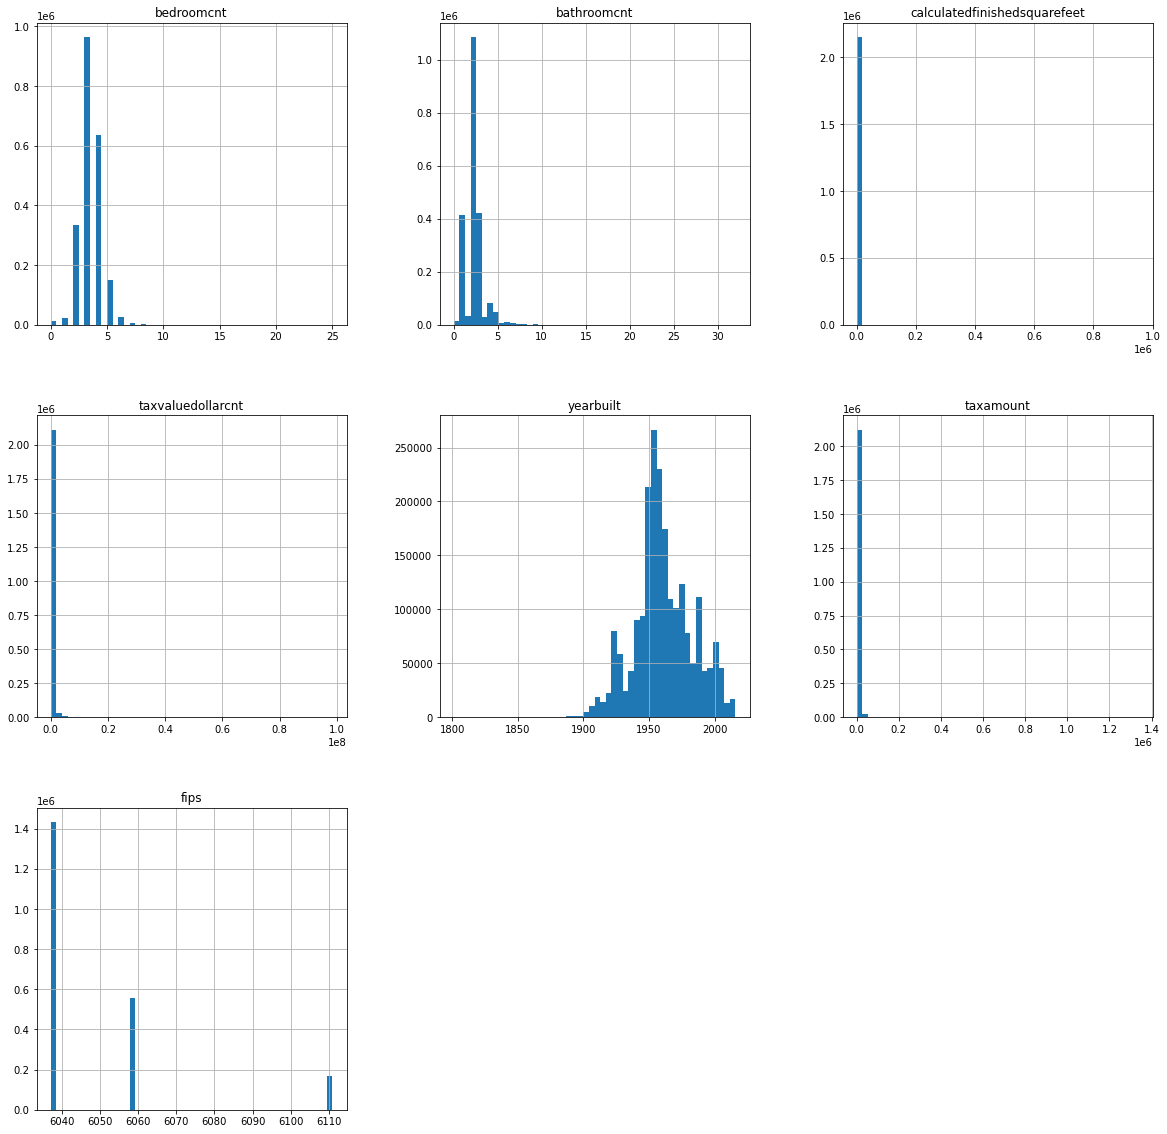

In [78]:
# visualize the distribution of each column
zillow17_sf.hist(bins=50, figsize=(20, 20))

In [79]:
# create a function that removes outliers
# k is the number of standard deviations to remove
def remove_outliers(df, k, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - k * iqr
    fence_high = q3 + k * iqr
    df = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df

In [81]:
# remove outliers from all columns
zillow17_sf = remove_outliers(zillow17_sf, 1.5, 'taxvaluedollarcnt')
zillow17_sf = remove_outliers(zillow17_sf, 1.5, 'taxamount')
zillow17_sf = remove_outliers(zillow17_sf, 1.5, 'calculatedfinishedsquarefeet')
zillow17_sf = remove_outliers(zillow17_sf, 1.5, 'yearbuilt')
zillow17_sf = remove_outliers(zillow17_sf, 1.5, 'bedroomcnt')
zillow17_sf = remove_outliers(zillow17_sf, 1.5, 'bathroomcnt')


In [82]:
# check the data
zillow17_sf.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1406931.0,3.383558,0.698148,2.00,3.000,3.0,4.000,5.00
bathroomcnt,1406931.0,2.280268,0.441192,1.50,2.000,2.0,2.500,3.00
calculatedfinishedsquarefeet,1406931.0,1767.613855,493.368134,120.00,1386.000,1666.0,2073.000,3266.00
taxvaluedollarcnt,1406931.0,349165.164737,203876.022444,1.00,191816.500,320119.0,477000.000,1053254.00
yearbuilt,1406931.0,1964.082021,17.567047,1915.00,1954.000,1962.0,1976.000,2006.00
taxamount,1406931.0,4294.940206,2289.020358,16.48,2578.245,3988.2,5741.635,10889.86
fips,1406931.0,6050.248532,21.530095,6037.00,6037.000,6037.0,6059.000,6111.00


array([[<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>],
       [<AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

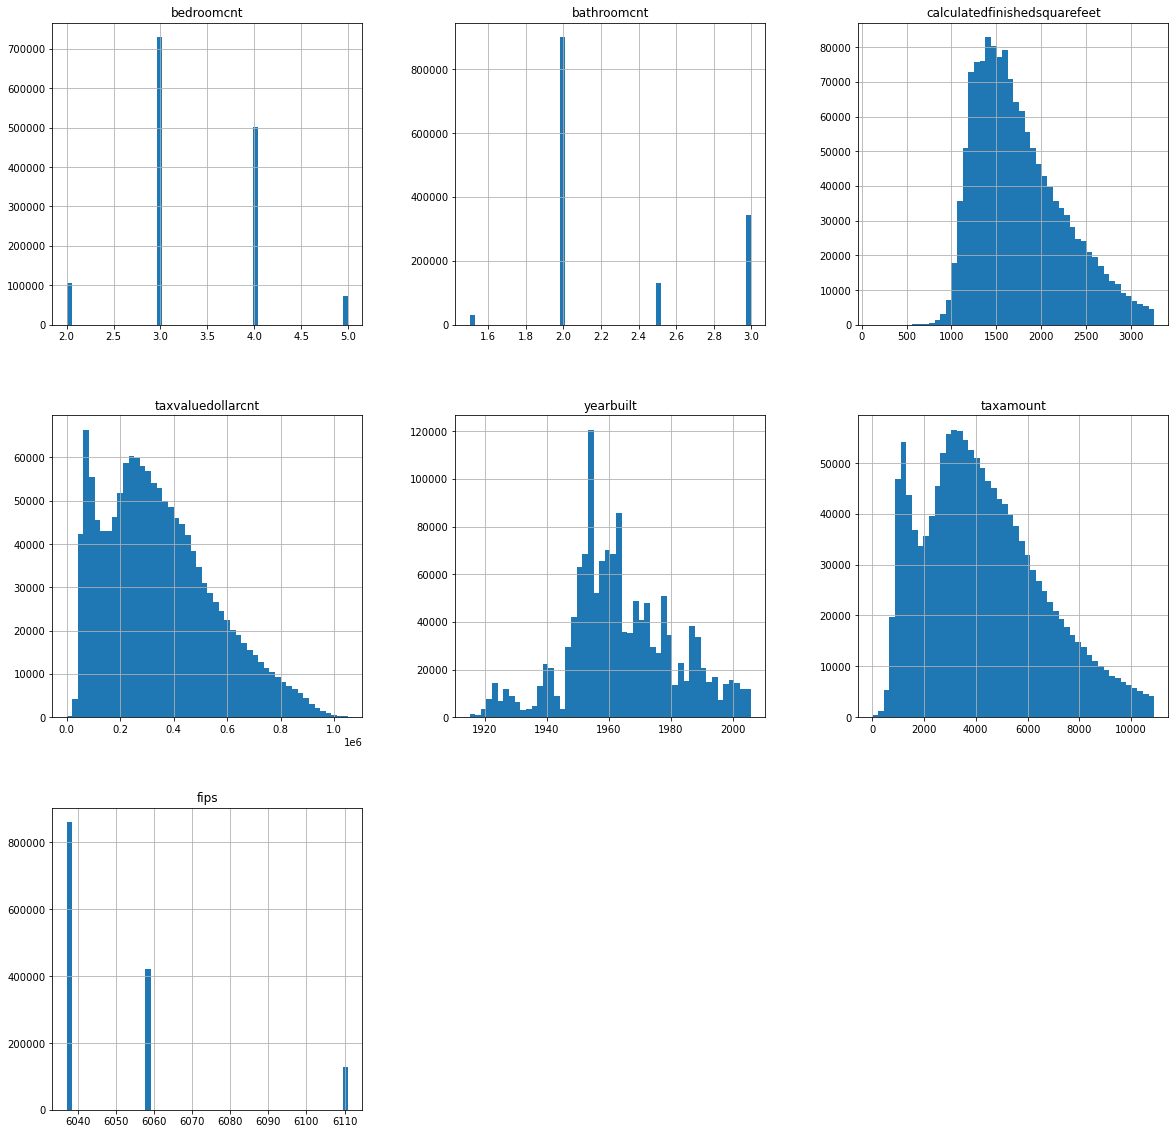

In [83]:
# visualize the distribution of each column
zillow17_sf.hist(bins=50, figsize=(20, 20))

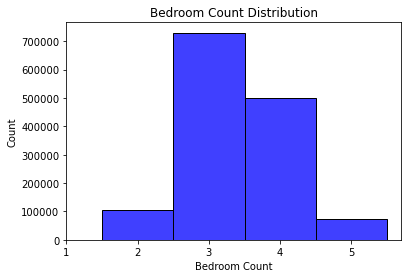

In [105]:
# bedroomcnt distribution utilizing histogram with lables

sns.histplot(zillow17_sf['bedroomcnt'], bins=20, color='blue', edgecolor='black', discrete=True)
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Bedroom Count')
plt.ylabel('Count')
plt.title('Bedroom Count Distribution')
plt.show()

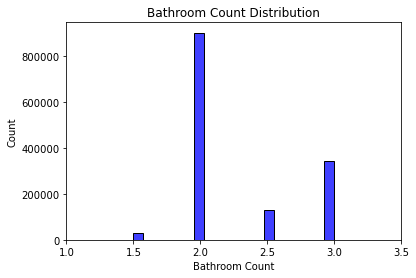

In [152]:
# bathroomcnt distribution with lables
sns.histplot(zillow17_sf['bathroomcnt'],bins=20, color='blue', edgecolor='black')
plt.xticks(np.arange(1, 4, .5))
plt.xlabel('Bathroom Count')
plt.ylabel('Count')
plt.title('Bathroom Count Distribution')
plt.show()

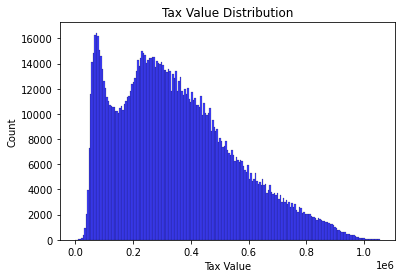

In [133]:
# taxvaluedollarcnt distribution with lables
sns.histplot(zillow17_sf['taxvaluedollarcnt'], color='blue', edgecolor='black')
plt.xlabel('Tax Value')
plt.ylabel('Count')
plt.title('Tax Value Distribution')
plt.show()

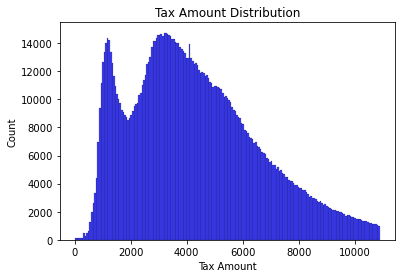

In [134]:
# taxamount distribution with lables
sns.histplot(zillow17_sf['taxamount'], color='blue', edgecolor='black')
plt.xlabel('Tax Amount')
plt.ylabel('Count')
plt.title('Tax Amount Distribution')
plt.show()

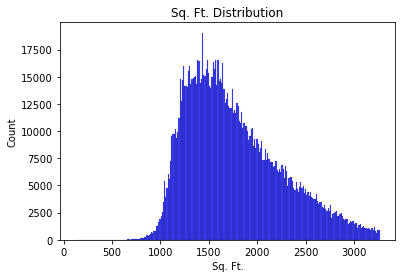

In [135]:
# calculatedfinishedsquarefeet distribution with lables
sns.histplot(zillow17_sf['calculatedfinishedsquarefeet'], color='blue', edgecolor='black')
plt.xlabel('Sq. Ft.')
plt.ylabel('Count')
plt.title('Sq. Ft. Distribution')
plt.show()

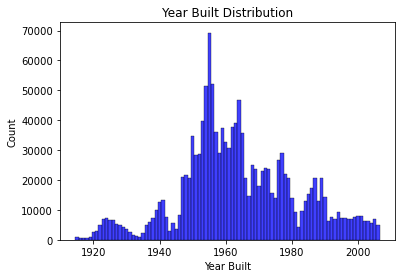

In [153]:
# yearbuilt distribution with lables
sns.histplot(zillow17_sf['yearbuilt'], color='blue', edgecolor='black', discrete=True)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Year Built Distribution')
plt.show()

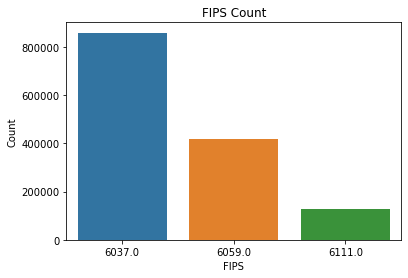

In [155]:
# visualize fibs with a countplot
sns.countplot(zillow17_sf['fips'])
plt.xlabel('FIPS')
plt.ylabel('Count')
plt.title('FIPS Count')
plt.show()
